In [51]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [142]:

neighborhoods = gpd.read_file("E:\\Neighborhoods_.shp")  

import geopandas as gpd





print(neighborhoods.head())


print("geometric type:", neighborhoods.geom_type.unique())


print("coordinate system:", neighborhoods.crs)

   OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0         1         233        42        003    140500          3   
1         2         203        42        003    140100          3   
2         3          86        42        003    101700          2   
3         4         214        42        003    050900          1   
4         5         173        42        003    300100          5   

        geoid10     namelsad10 mtfcc10 funcstat10  ...  created_us  \
0  420031405003  Block Group 3   G5030          S  ...         SDE   
1  420031401003  Block Group 3   G5030          S  ...         SDE   
2  420031017002  Block Group 2   G5030          S  ...         SDE   
3  420030509001  Block Group 1   G5030          S  ...         SDE   
4  420033001005  Block Group 5   G5030          S  ...         SDE   

   created_da last_edite last_edi_1  temp  pghdb_sde_  \
0  2020-08-14        SDE 2020-08-14  None   7968760.0   
1  2020-08-14        SDE 2020-08-14  None  3407871

In [143]:


complaints = pd.read_csv("D:\\Downloads\\29462525-62a6-45bf-9b5e-ad2e1c06348d.csv")


if 'latitude' not in complaints.columns or 'longitude' not in complaints.columns:
    raise ValueError("The 311_complaints dataset must have 'latitude' and 'longitude' columns.")


complaints['geometry'] = complaints.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
complaints_gdf = gpd.GeoDataFrame(complaints, geometry='geometry', crs='EPSG:4326')


neighborhoods = neighborhoods.to_crs(epsg=4326)


complaints_with_neighborhood = gpd.sjoin(complaints_gdf, neighborhoods, how='left', predicate='intersects')


complaint_counts = complaints_with_neighborhood['hood'].value_counts().reset_index()
complaint_counts.columns = ['hood', 'complaint_count']


print(complaint_counts)


neighborhoods['complaint_count'] = neighborhoods['hood'].map(
    complaint_counts.set_index('hood')['complaint_count']
).fillna(0)


                   hood  complaint_count
0             Brookline            31306
1               Carrick            29951
2     South Side Slopes            28452
3      South Side Flats            28423
4   Squirrel Hill South            28089
..                  ...              ...
85            Ridgemont              927
86        East Carnegie              892
87    Northview Heights              813
88           Glen Hazel              501
89    Arlington Heights              161

[90 rows x 2 columns]


   OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0         1         233        42        003    140500          3   
1         2         203        42        003    140100          3   
2         3          86        42        003    101700          2   
3         4         214        42        003    050900          1   
4         5         173        42        003    300100          5   

        geoid10     namelsad10 mtfcc10 funcstat10  ...  last_edi_1  temp  \
0  420031405003  Block Group 3   G5030          S  ...  2020-08-14  None   
1  420031401003  Block Group 3   G5030          S  ...  2020-08-14  None   
2  420031017002  Block Group 2   G5030          S  ...  2020-08-14  None   
3  420030509001  Block Group 1   G5030          S  ...  2020-08-14  None   
4  420033001005  Block Group 5   G5030          S  ...  2020-08-14  None   

   pghdb_sde_                              GlobalID    Shape__Are  \
0   7968760.0  a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0  8.4170

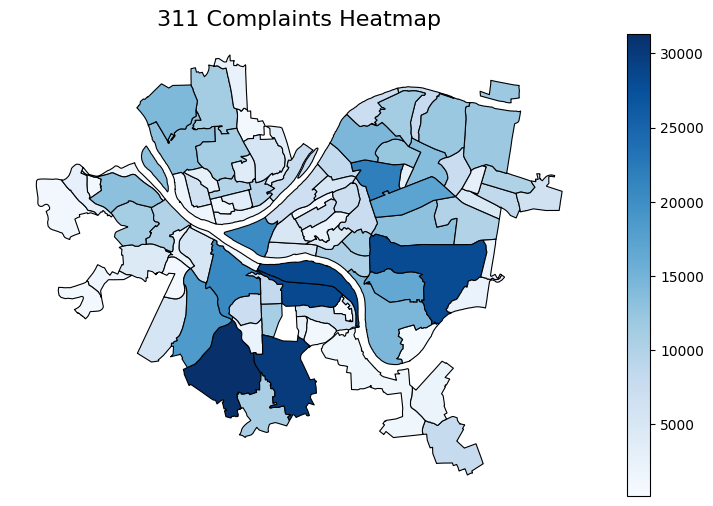

In [145]:

neighborhoods = neighborhoods.merge(complaint_counts, left_on='hood', right_on='hood', how='left')
print(neighborhoods.head())  

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
neighborhoods.plot(
    column='complaint_count',  
    cmap='Blues',  
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax
)


plt.title('311 Complaints Heatmap', fontsize=16)
ax.set_axis_off()

plt.show()

51                Carrick
24              Brookline
4               Knoxville
48      South Side Slopes
80    Squirrel Hill South
27             Greenfield
11           East Liberty
55             East Hills
87                Elliott
60              Hazelwood
Name: hood, dtype: object 51    9461440
24    5150434
4     4889959
48    4667864
80    4340340
27    4184150
11    3656206
55    3448055
87    3365945
60    3289008
Name: benefit_count, dtype: int64


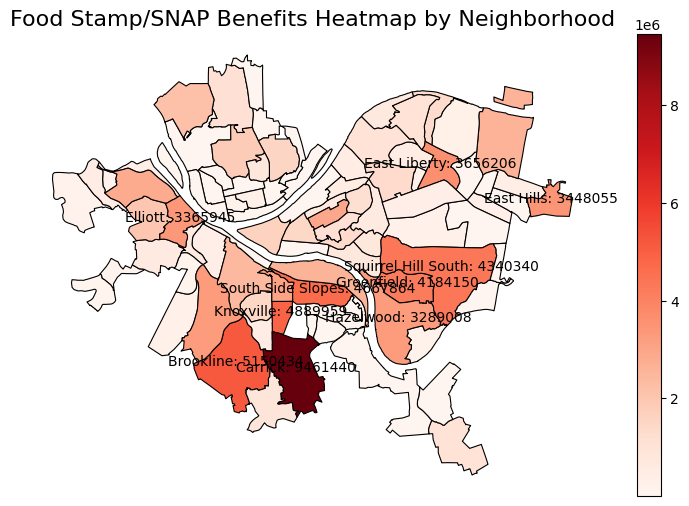

In [146]:

neighborhoods = gpd.read_file("E:\\Neighborhoods_.shp")


data = pd.read_csv("E:\\1171\\Copy of merged_311_acs.csv")
import warnings

warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
data = pd.read_csv("E:\\1171\\Copy of merged_311_acs.csv")


target_column = 'Estimate_INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)_Total households_With Food Stamp/SNAP benefits in the past 12 months'
if target_column not in data.columns or 'neighborhood' not in data.columns:
    raise ValueError(f"The dataset must have '{target_column}' and 'neighborhood' columns.")


benefit_counts = data.groupby('neighborhood')[target_column].sum().reset_index()
benefit_counts.columns = ['hood', 'benefit_count']  


neighborhoods = neighborhoods.merge(benefit_counts, left_on='hood', right_on='hood', how='left')


neighborhoods['benefit_count'] = neighborhoods['benefit_count'].fillna(0)
top10_neighborhoods = neighborhoods.sort_values(by='benefit_count', ascending=False).head(10)
print(top10_neighborhoods['hood'],top10_neighborhoods['benefit_count'])

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
neighborhoods.plot(
    column='benefit_count',  
    cmap='Reds',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax
)
for x, y, label, name in zip(top10_neighborhoods['geometry'].centroid.x, top10_neighborhoods['geometry'].centroid.y, top10_neighborhoods['benefit_count'], top10_neighborhoods['hood']):
    ax.annotate(
        f'{name}: {int(label)}',  
        xy=(x, y), 
        ha='center', 
        fontsize=10, 
        color='black'
    )

plt.title('Food Stamp/SNAP Benefits Heatmap by Neighborhood', fontsize=16)
ax.set_axis_off()

plt.show()

In [147]:
import csv
with open("D:\\Downloads\\adf1fd38-c374-4c4e-9094-5e53bd12419f.csv", 'r') as f:
    parcel_centroids = csv.DictReader(f)
    neighborhood_by_pin = {}
    for row in parcel_centroids:
        if row['geo_name_n'] != '':
            neighborhood_by_pin[row['PIN']] = row['geo_name_n']
violations_df = pd.read_csv("D:\\Downloads\\70c06278-92c5-4040-ab28-17671866f81c.csv") 

In [148]:
violations_df.rename(columns={'parcel_id': 'PIN'}, inplace=True)

violations_df['hood'] = violations_df['PIN'].map(neighborhood_by_pin)



violation_counts = violations_df.groupby('hood').size().reset_index(name='violation_counts')


neighborhoods1 = gpd.read_file("E:\\Neighborhoods_.shp")

neighborhoods_with_violations = neighborhoods1.merge(
    violation_counts,
    left_on='hood',
    right_on='hood',
    how='left'
)



In [149]:

neighborhoods_with_violations["violation_counts"] = neighborhoods_with_violations["violation_counts"].fillna(0)


In [150]:
print(neighborhoods_with_violations["violation_counts"].max())

16773


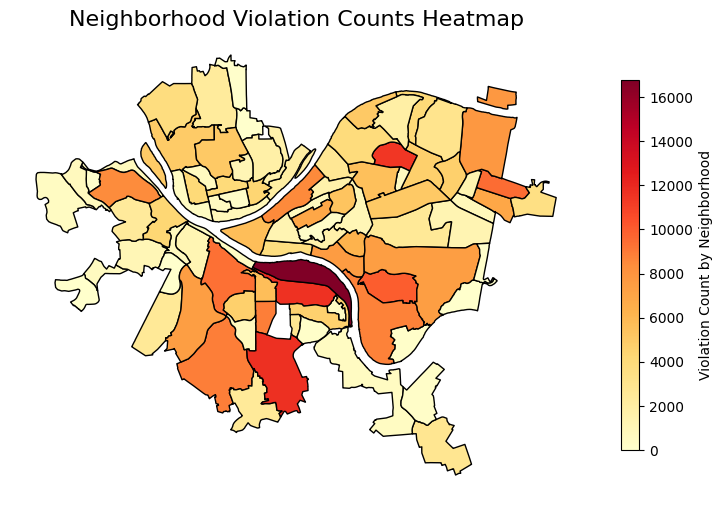

In [151]:

fig, ax = plt.subplots(figsize=(10, 6))


neighborhoods_with_violations.plot(
    column="violation_counts",
    cmap="YlOrRd",  
    ax=ax,
    edgecolor="black"  
)


vmin = 0  
vmax = neighborhoods_with_violations["violation_counts"].max() 
sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, shrink=0.8)

cbar.set_label("Violation Count by Neighborhood")


plt.title("Neighborhood Violation Counts Heatmap", fontsize=16)
plt.axis("off")


plt.show()

In [152]:


vacant_addresses = pd.read_csv("D:\\Downloads\\70dd02d2-137d-43c9-b158-f7b1ec6c6d42.csv")

vacant_addresses['geoid'] = vacant_addresses['geoid'].astype(str).str.strip()


with open("D:\\Downloads\\adf1fd38-c374-4c4e-9094-5e53bd12419f.csv", 'r') as f:
    parcel_centroids = csv.DictReader(f)
    neighborhood_by_geo_id = {row['geo_id_tra'].strip(): row['geo_name_n'] for row in parcel_centroids if row['geo_name_n'] != ''}

vacant_addresses['hood'] = vacant_addresses['geoid'].map(neighborhood_by_geo_id)

print(vacant_addresses[['geoid', 'hood']].head()) 

neighborhoods = gpd.read_file("E:\\Neighborhoods_.shp")

         geoid hood
0  42129800500  NaN
1  42125722700  NaN
2  42003401200     
3  42129806100  NaN
4  42003471000     


    OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0          1         233        42        003    140500          3   
1          2         203        42        003    140100          3   
2          3          86        42        003    101700          2   
3          4         214        42        003    050900          1   
4          5         173        42        003    300100          5   
..       ...         ...       ...        ...       ...        ...   
85        86         215        42        003    141000          1   
86        87         211        42        003    051100          1   
87        88         153        42        003    562600          2   
88        89          16        42        003    170200          1   
89        90          31        42        003    250900          2   

         geoid10     namelsad10 mtfcc10 funcstat10  ...  created_da  \
0   420031405003  Block Group 3   G5030          S  ...  2020-08-14   
1   420031401003 

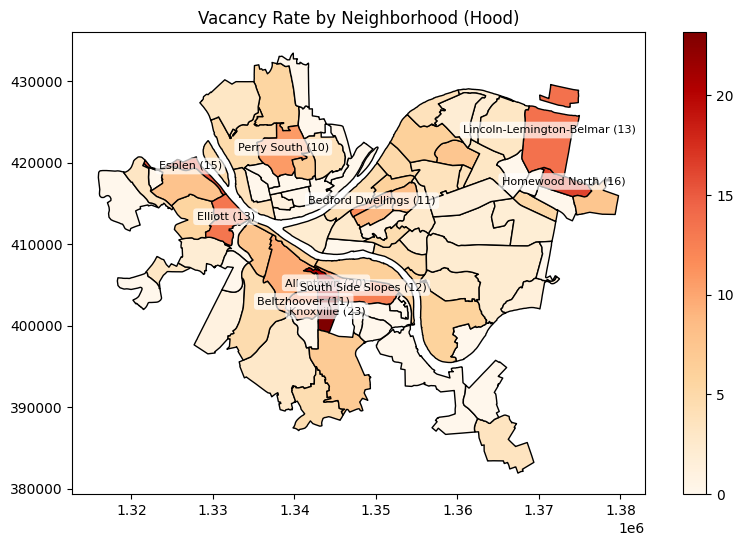

In [153]:

vacant_counts = vacant_addresses.groupby('hood')['total_vac_count'].sum().reset_index(name='vacant_count')
total_counts_by_hood = vacant_addresses.groupby('hood')['total_address_count'].sum().reset_index()  
combined_data = vacant_counts.merge(total_counts_by_hood, on='hood', how='left')
combined_data['vacancy_rate'] = (combined_data['vacant_count'] / combined_data['total_address_count']) * 100

neighborhoods = neighborhoods.merge(combined_data[['hood', 'vacancy_rate']], left_on='hood', right_on='hood', how='left')

print(neighborhoods)

neighborhoods['vacancy_rate'] = neighborhoods['vacancy_rate'].fillna(0)
top_10_neighborhoods = neighborhoods.nlargest(10, 'vacancy_rate')


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
neighborhoods.plot(
    column='vacancy_rate',
    cmap='OrRd',
    legend=True,
    ax=ax,
    edgecolor='black'
)
for _, row in top_10_neighborhoods.iterrows():
    plt.text(
        row['geometry'].centroid.x,
        row['geometry'].centroid.y,
        f"{row['hood']} ({int(row['vacancy_rate'])})",
        fontsize=8,
        ha='center',
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')
    )
ax.set_title("Vacancy Rate by Neighborhood (Hood)")
plt.show()

In [154]:
print(top_10_neighborhoods['hood'])

4                    Knoxville
30                   Allentown
17              Homewood North
58                      Esplen
21    Lincoln-Lemington-Belmar
87                     Elliott
48           South Side Slopes
26                 Beltzhoover
3            Bedford Dwellings
83                 Perry South
Name: hood, dtype: object


In [155]:
print(top_10_neighborhoods['vacancy_rate'])

4     23.160173
30    20.560438
17    16.368360
58    15.657177
21    13.589540
87    13.264754
48    12.584721
26    11.793826
3     11.654135
83    10.749805
Name: vacancy_rate, dtype: float64


           neighborhood  pothole_complaint_count
0      Allegheny Center                      205
1        Allegheny West                      118
2             Allentown                      455
3             Arlington                      448
4     Arlington Heights                       30
..                  ...                      ...
86  Upper Lawrenceville                      640
87             West End                      207
88         West Oakland                      387
89             Westwood                      382
90              Windgap                      309

[91 rows x 2 columns]
    OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0          1         233        42        003    140500          3   
1          2         203        42        003    140100          3   
2          3          86        42        003    101700          2   
3          4         214        42        003    050900          1   
4          5         173        42     

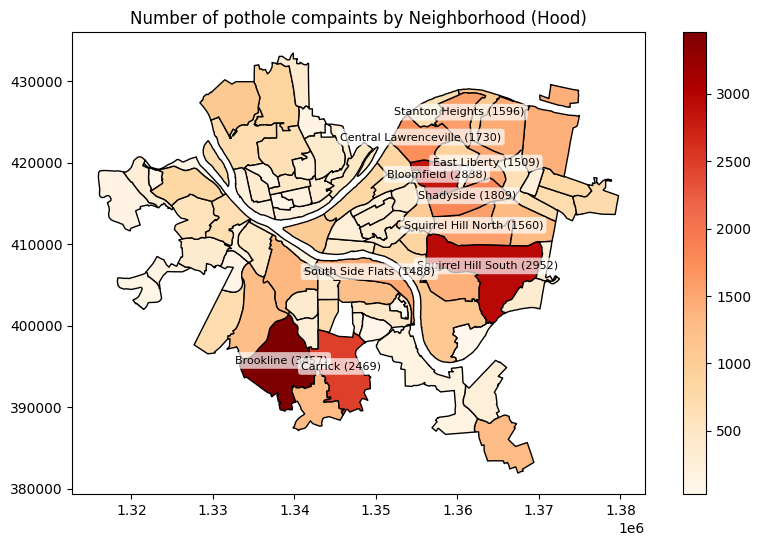

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

df_311 = pd.read_csv("D:\\Downloads\\29462525-62a6-45bf-9b5e-ad2e1c06348d.csv")

pothole_requests = df_311[df_311['request_type_name'].str.contains('Potholes', case=False, na=False)]
neighborhoods = gpd.read_file("E:\\Neighborhoods_.shp")  # 包含社区边界
# Count pothole complaints by neighborhood
pothole_complaints = pothole_requests.groupby('neighborhood').size().reset_index(name='pothole_complaint_count')
print(pothole_complaints)
neighborhoods_with_potholes_complaints = neighborhoods.merge(
    pothole_complaints,
    left_on='hood',
    right_on='neighborhood',
    how='left'
)
print(neighborhoods_with_potholes_complaints)
neighborhoods_with_potholes_complaints['pothole_complaint_count'] = neighborhoods_with_potholes_complaints['pothole_complaint_count'].fillna(0)
top_10_neighborhoods = neighborhoods_with_potholes_complaints.nlargest(10, 'pothole_complaint_count')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
neighborhoods_with_potholes_complaints.plot(
    column='pothole_complaint_count',
    cmap='OrRd',
    legend=True,
    ax=ax,
    edgecolor='black'
)
for _, row in top_10_neighborhoods.iterrows():
    plt.text(
        row['geometry'].centroid.x,
        row['geometry'].centroid.y,
        f"{row['hood']} ({int(row['pothole_complaint_count'])})",
        fontsize=8,
        ha='center',
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')
    )

ax.set_title("Number of pothole compaints by Neighborhood (Hood)")
plt.show()


           neighborhood  vacant_complaint_count
0      Allegheny Center                       2
1             Allentown                      12
2             Arlington                       9
3             Beechview                       7
4           Beltzhoover                      10
..                  ...                     ...
67  Upper Lawrenceville                      10
68             West End                       8
69         West Oakland                       1
70             Westwood                      14
71              Windgap                       2

[72 rows x 2 columns]
    OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0          1         233        42        003    140500          3   
1          2         203        42        003    140100          3   
2          3          86        42        003    101700          2   
3          4         214        42        003    050900          1   
4          5         173        42        003    30

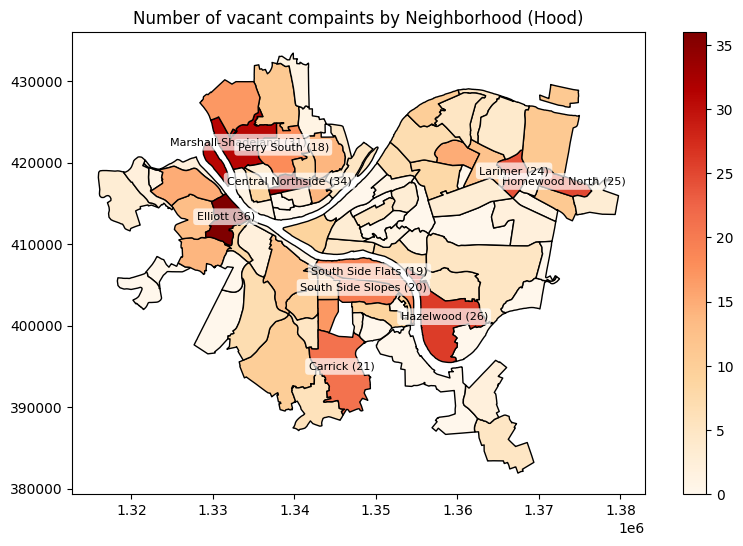

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

df_311 = pd.read_csv("D:\\Downloads\\29462525-62a6-45bf-9b5e-ad2e1c06348d.csv")

filtered_requests = df_311[
    (df_311['request_type_name'].isin(['Vacant Building', 'Vacant Lot'])) &
    (pd.to_datetime(df_311['create_date_et']) > pd.Timestamp('2023-01-01'))
]
neighborhoods = gpd.read_file("E:\\Neighborhoods_.shp")  

vacant_complaints = filtered_requests.groupby('neighborhood').size().reset_index(name='vacant_complaint_count')
print(vacant_complaints)
neighborhoods_with_vacant_complaints = neighborhoods.merge(
    vacant_complaints,
    left_on='hood',
    right_on='neighborhood',
    how='left'
)
print(neighborhoods_with_vacant_complaints)
neighborhoods_with_vacant_complaints['vacant_complaint_count'] = neighborhoods_with_vacant_complaints['vacant_complaint_count'].fillna(0)
top_10_neighborhoods = neighborhoods_with_vacant_complaints.nlargest(10, 'vacant_complaint_count')
print(top_10_neighborhoods)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
neighborhoods_with_vacant_complaints.plot(
    column='vacant_complaint_count',
    cmap='OrRd',
    legend=True,
    ax=ax,
    edgecolor='black'
)
for _, row in top_10_neighborhoods.iterrows():
    plt.text(
        row['geometry'].centroid.x,
        row['geometry'].centroid.y,
        f"{row['hood']} ({int(row['vacant_complaint_count'])})",
        fontsize=8,
        ha='center',
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')
    )

ax.set_title("Number of vacant compaints by Neighborhood (Hood)")
plt.show()


           neighborhood  weeds_debris_complaint_count
0      Allegheny Center                             7
1        Allegheny West                            11
2             Allentown                           280
3             Arlington                           265
4     Arlington Heights                             1
..                  ...                           ...
85  Upper Lawrenceville                           121
86             West End                            17
87         West Oakland                            72
88             Westwood                            83
89              Windgap                            72

[90 rows x 2 columns]
    OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0          1         233        42        003    140500          3   
1          2         203        42        003    140100          3   
2          3          86        42        003    101700          2   
3          4         214        42        003    

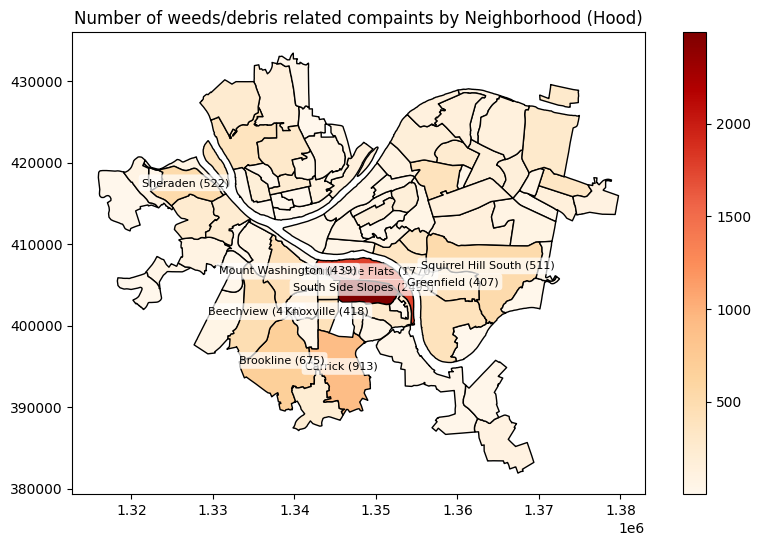

In [159]:

df_311 = pd.read_csv("D:\\Downloads\\29462525-62a6-45bf-9b5e-ad2e1c06348d.csv")

keywords = ['Weeds', 'Debris']
filtered_requests = df_311[
    df_311['request_type_name'].str.contains('|'.join(keywords), case=False, na=False) &
    (pd.to_datetime(df_311['create_date_et']) > pd.Timestamp('2023-01-01'))
]

neighborhoods = gpd.read_file("E:\\Neighborhoods_.shp")  

weeds_debris_complaints = filtered_requests.groupby('neighborhood').size().reset_index(name='weeds_debris_complaint_count')
print(weeds_debris_complaints)
neighborhoods_with_weeds_debris_complaints = neighborhoods.merge(
    weeds_debris_complaints,
    left_on='hood',
    right_on='neighborhood',
    how='left'
)
print(neighborhoods_with_weeds_debris_complaints)
neighborhoods_with_weeds_debris_complaints['weeds_debris_complaint_count'] = neighborhoods_with_weeds_debris_complaints['weeds_debris_complaint_count'].fillna(0)
top_10_neighborhoods = neighborhoods_with_weeds_debris_complaints.nlargest(10, 'weeds_debris_complaint_count')
print(top_10_neighborhoods)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
neighborhoods_with_weeds_debris_complaints.plot(
    column='weeds_debris_complaint_count',
    cmap='OrRd',
    legend=True,
    ax=ax,
    edgecolor='black'
)
for _, row in top_10_neighborhoods.iterrows():
    plt.text(
        row['geometry'].centroid.x,
        row['geometry'].centroid.y,
        f"{row['hood']} ({int(row['weeds_debris_complaint_count'])})",
        fontsize=8,
        ha='center',
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')
    )

ax.set_title("Number of weeds/debris related compaints by Neighborhood (Hood)")
plt.show()

    OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0          1         233        42        003    140500          3   
1          2         203        42        003    140100          3   
2          3          86        42        003    101700          2   
3          4         214        42        003    050900          1   
4          5         173        42        003    300100          5   
..       ...         ...       ...        ...       ...        ...   
85        86         215        42        003    141000          1   
86        87         211        42        003    051100          1   
87        88         153        42        003    562600          2   
88        89          16        42        003    170200          1   
89        90          31        42        003    250900          2   

         geoid10     namelsad10 mtfcc10 funcstat10  ...  created_da  \
0   420031405003  Block Group 3   G5030          S  ...  2020-08-14   
1   420031401003 

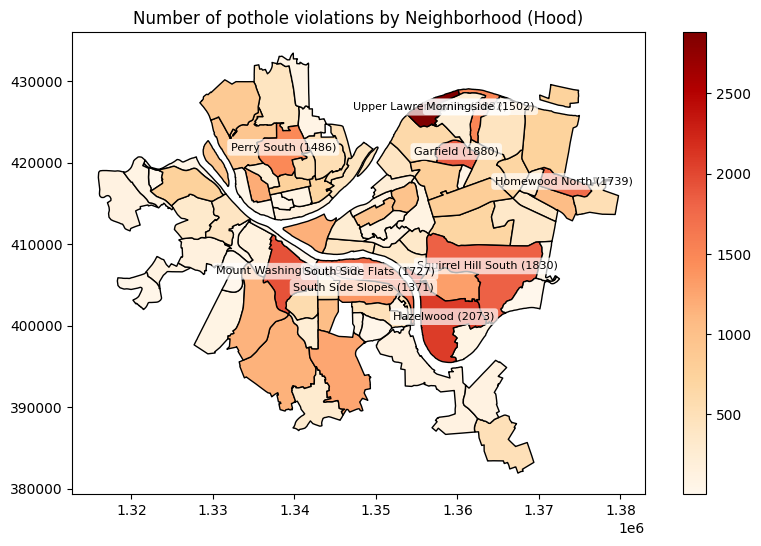

In [160]:
neighborhoods = gpd.read_file("E:\\Neighborhoods_.shp") 
keywords = ['pothole', 'sign', 'road condition', 'surface damage', 'repair', 'hazard', 'obstruction']
mask = violations_df['violation_spec_instructions'].str.contains('|'.join(keywords), case=False, na=False)


related_violations = violations_df[mask]


violations_count = related_violations.groupby('hood').size().reset_index(name='potholes_violation_count')

neighborhoods_with_potholes_violations = neighborhoods.merge(
    violations_count,
    left_on='hood',
    right_on='hood',
    how='left'
)
print(neighborhoods_with_potholes_violations)

neighborhoods_with_potholes_violations['potholes_violation_count'] = neighborhoods_with_potholes_violations['potholes_violation_count'].fillna(0)
filtered_neighborhoods = neighborhoods_with_potholes_violations[
    neighborhoods_with_potholes_violations['hood'] != 'Strip District'
]


top_10_neighborhoods = filtered_neighborhoods.nlargest(10, 'potholes_violation_count')
print(top_10_neighborhoods['hood'],top_10_neighborhoods['potholes_violation_count'])
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
filtered_neighborhoods.plot(
    column='potholes_violation_count',
    cmap='OrRd',
    legend=True,
    ax=ax,
    edgecolor='black'
)
ax.set_title("Number of pothole violations by Neighborhood (Hood)")
for _, row in top_10_neighborhoods.iterrows():
    plt.text(
        row['geometry'].centroid.x,
        row['geometry'].centroid.y,
        f"{row['hood']} ({int(row['potholes_violation_count'])})",
        fontsize=8,
        ha='center',
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')
    )
plt.show()


    OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0          1         233        42        003    140500          3   
1          2         203        42        003    140100          3   
2          3          86        42        003    101700          2   
3          4         214        42        003    050900          1   
4          5         173        42        003    300100          5   
..       ...         ...       ...        ...       ...        ...   
85        86         215        42        003    141000          1   
86        87         211        42        003    051100          1   
87        88         153        42        003    562600          2   
88        89          16        42        003    170200          1   
89        90          31        42        003    250900          2   

         geoid10     namelsad10 mtfcc10 funcstat10  ...  created_da  \
0   420031405003  Block Group 3   G5030          S  ...  2020-08-14   
1   420031401003 

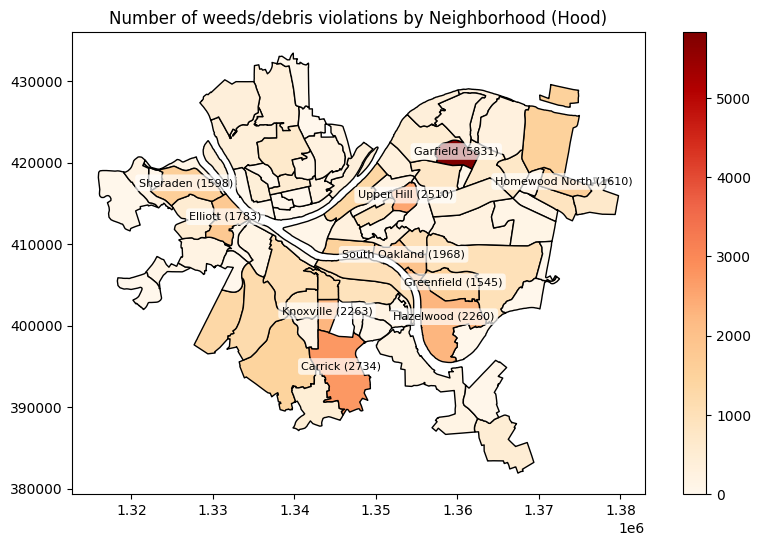

In [161]:
neighborhoods = gpd.read_file("E:\\Neighborhoods_.shp") 

keywords = ['weeds', 'debris']
mask = violations_df['violation_spec_instructions'].str.contains('|'.join(keywords), case=False, na=False)


related_violations = violations_df[mask]

violations_count = related_violations.groupby('hood').size().reset_index(name='weeds_debris_violation_count')

neighborhoods_with_weeds_debris_violations = neighborhoods.merge(
    violations_count,
    left_on='hood',
    right_on='hood',
    how='left'
)
print(neighborhoods_with_weeds_debris_violations)

neighborhoods_with_weeds_debris_violations['weeds_debris_violation_count'] = neighborhoods_with_weeds_debris_violations['weeds_debris_violation_count'].fillna(0)


top_10_neighborhoods = neighborhoods_with_weeds_debris_violations.nlargest(10, 'weeds_debris_violation_count')
print(top_10_neighborhoods['hood'],top_10_neighborhoods['weeds_debris_violation_count'])
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
neighborhoods_with_weeds_debris_violations.plot(
    column='weeds_debris_violation_count',
    cmap='OrRd',
    legend=True,
    ax=ax,
    edgecolor='black'
)
ax.set_title("Number of weeds/debris violations by Neighborhood (Hood)")
for _, row in top_10_neighborhoods.iterrows():
    plt.text(
        row['geometry'].centroid.x,
        row['geometry'].centroid.y,
        f"{row['hood']} ({int(row['weeds_debris_violation_count'])})",
        fontsize=8,
        ha='center',
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')
    )
plt.show()
